# <p style="text-align: center;">MIS 382N: ADVANCED PREDICTIVE MODELING - MSBA</p>
# <p style="text-align: center;">Assignment 1</p>
## <p style="text-align: center;">Total points: 85</p>
## <p style="text-align: center;">Due: Monday, September 14 submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Your partner needs to be from the same section. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTEID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group. If you do change, let the TA know. 

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Question 1: Challenges in Data Science (10 pts)

Refer to the Domino guide under Modules --> Additional Resources

Section 2 describes 8 Challenges. You may have personally encountered or heard of somebody else who encountered some of these challenge. If so, please write 1-2 paragraphs on what situation was encountered and how it mapped into one the mentioned challenges. If not, think of a hypothetical case and do the same exercise.

## Answer

One example of right problem that had already been solved but was irreproducible was when a business analyst at a finance company created a monthly report using simpler steps and software, and later realized that essentially the exact same results could have been obtained from using AutoCAD. However, when attempting to follow the procedure for the AutoCAD process, he realized that the procedure was flawed: he could not reproduce the right results. In other words, it turned out that he found a better solution to a problem that previously had an incorrectly documented and possibly outdated process.

An example of solving the right problem in the wrong way would be using a robust but low-explainability predictive model to decide on a course of action, when the task is really to develop a model that is intuitive enough to convince managers and non-data-scientists to adopt it. The "correct answer" is technically achieved, but the true goal of mass usability is not.


# Question 2: Guess the coin (5+5 = 10 points)

Assume we are playing a guessing game with a friend. The friend has three coins at hand:
* **Coin A**: a fair coin with equal probability of being head (H ) or tail (T)
* **Coin B**: a biased coin with a probability of 0.75 being head (H)
* **Coin C**: a coin with a probability of $P^*(H)$ being head (H)

The friend secretly picked one of the coins, randomly flipped it a few times, and get a sequence of *HTHHTT* (all of which come from the same coin he picked). 

1. If you had to choose between whether **Coin A** or **Coin B** was used, and you prefer the one which is more likely, which one will you choose?  (5 points)
2. What would be the value of  $P^*(H)$ such that **Coin C** corresponds to the most likely (among infinite possible coins) coin to have produced the observed sequence?(i.e. provide  an analytical derivation for $P^*(H)$ using maximum likelihood estimation (MLE))."

## Answer

In the spirit of M.L.P., our set of possible distributions are the ones given: A being a binomial distribution of p = 0.5 and B being one of p = 0.75 (p being probability of heads). The question is which distribution in the set maximizes the probability of getting the sequence *HTHHTT* (assuming independent flips).

Therefore, it is clear to see that with distribution A, the probability is 0.5^6 = 0.015625, whereas with distribution B, it is 0.75^3 \* 0.25^3 = 0.00659179687. Therefore, A maximizes the probability, and therefore it is more likely to have been coin A that was flipped.




The probability is p^3 * (1-p)^3, and to maximize that, we look at the first-order condition, set it equal to 0, and then solve:

-3 * (1-p)^2 * p^3 + (1-p)^3 * 3 * p^2 = 0

You also need second-order condition to be negative:

6 * p * (1 - 6 * p + 10 * p^2 - 5 * p^3) < 0

The two conditions solve out to be p = 0.5, or the exact same as Coin A.

# Question 3: Multiple Linear Regression (30 pts)

In this problem you will try to estimate the height of a fish based on some other properties using MLRR. Use the following code to import the Fish market prices dataset in python. The dataset is taken from https://www.kaggle.com/aungpyaeap/fish-market.

In [28]:
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None


df = pd.read_csv("data.csv", index_col=0)
df = df[~df.isin([0, np.nan, np.inf, -np.inf]).any(1)]
df.head()

,Weight,Length1,Length2,Length3,Height,Width
Species,,,,,,
Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


Here,
1. Species: Species name of fish
2. Weight: Weight of fish in gram
3. Length1: Vertical length in cm
4. Length2: Diagonal length in cm
5. Length3: Cross length in cm
6. Height: Height in cm
7. Width: Diagonal width in cm

In [29]:
df = df.fillna(0)
X = df.drop(['Weight'], axis=1)
y = df['Weight']

Consider the `Weight` column to be your target variable.

a. (2 pts)  Print the shape (number of rows and columns) of the feature matrix X, and print the first 5 rows.

b. (6 pts) Using ordinary least squares, fit a multiple linear regression (MLR) on all the feature variables using the entire dataset. Report the regression coefficient of each input feature and evaluate the model using mean absolute error (MAE). Example of ordinary least squares in Python is shown in Section 1.1.1 of http://scikit-learn.org/stable/modules/linear_model.html.

c. (6 pts) Split the data into a training set and a test set, using the train_test_split with test_size = 0.25 and random_state = 50. Fit an MLR using the training set. Evaluate the trained model using the training set and the test set, respectively. Compare the two MAE values thus obtained. Report the [$R^2$ (coefficient of determination)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html) value.

d. (5 pts) Calculate the pearson correlation matrix of the independent variables in the training set. Report the variables which have magnitude of correlation greater than 0.8 w.r.t the variable 'Length2'. Now, plot a pairplot based on Species column as seen in the 2nd plot [here](https://seaborn.pydata.org/generated/seaborn.pairplot.html). How does the pairplot validate your previous answer?

e. (6 pts) Plot the histogram of Y_train and see its distribution. Now take log of Y_train and plot its histogram. Now run regression again after taking log and compare the MAE. You need to do np.exp(predictions) to bring them back to original scale, and then calculate MAE and $R^2$. Explain the results.

f. (5 pts) Rank the features in descending order based on their significance. You might find this link to be helpful: http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html.

g. (Bonus question - 5 pts) Use the Species column for one-hot encoding and perform part c of this question. Explain your results.

## Answer

a.

In [30]:
X['Species'] = X.index

str(len(X.index)) + ', ' + str(len(X.columns))

'158, 6'

In [31]:
X.drop(['Species'], axis=1)[:5]

,Length1,Length2,Length3,Height,Width
Species,,,,,
Bream,23.2,25.4,30.0,11.5200,4.0200
Bream,24.0,26.3,31.2,12.4800,4.3056
Bream,23.9,26.5,31.1,12.3778,4.6961
Bream,26.3,29.0,33.5,12.7300,4.4555
Bream,26.5,29.0,34.0,12.4440,5.1340


b.

In [32]:
X = pd.get_dummies(data=X, drop_first=True)

In [33]:
reg = linear_model.LinearRegression()

reg.fit(X.values, y.values)

reg.coef_

array([ -79.84426339,   81.70907239,   30.27257711,    5.80686491,
         -0.78185103,  160.92123671,  133.55423232, -209.02624069,
        104.9242595 ,  442.21254448,   91.56876978])

In [34]:
X.columns

Index(['Length1', 'Length2', 'Length3', 'Height', 'Width', 'Species_Parkki',
       'Species_Perch', 'Species_Pike', 'Species_Roach', 'Species_Smelt',
       'Species_Whitefish'],
      dtype='object')

In [35]:
sum(np.abs(reg.predict(X) - y.values)) / len(y.values)

66.11307659297076

In [36]:
yTrue = y.values
yPred = reg.predict(X)

mean_absolute_error(yTrue, yPred)

66.11307659297081

c.

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)

In [38]:
reg = linear_model.LinearRegression()

reg.fit(X_train.values, y_train.values)

reg.coef_

array([-113.64836522,  139.1917073 ,    5.93970426,    1.02478777,
         10.29783301,  118.01486471,   31.34623843, -305.08725668,
         50.96424922,  392.8645339 ,   -1.93014938])

In [39]:
sum(np.abs(reg.predict(X_train) - y_train.values)) / len(y_train.values)

63.15937130081545

In [40]:
from sklearn.metrics import r2_score

r2_score(y_train.values, reg.predict(X_train))

0.9292624473278824

In [41]:
sum(np.abs(reg.predict(X_test) - y_test.values)) / len(y_test.values)

72.60591304330002

In [42]:
r2_score(y_test.values, reg.predict(X_test))

0.9444710892480661

d.

In [43]:
X = df.drop(['Weight'], axis=1)

X['Species'] = X.index

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)

pearson = X_train.corr()

pearson

,Length1,Length2,Length3,Height,Width
Length1,1.000000,0.999415,0.990696,0.594366,0.843893
Length2,0.999415,1.000000,0.993202,0.612155,0.851321
Length3,0.990696,0.993202,1.000000,0.681548,0.857178
Height,0.594366,0.612155,0.681548,1.000000,0.775991
Width,0.843893,0.851321,0.857178,0.775991,1.000000


In [44]:
pearson['Length2'][abs(pearson['Length2']) > 0.8].index

Index(['Length1', 'Length2', 'Length3', 'Width'], dtype='object')

In [1]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)

g = sns.pairplot(X_train, hue="Species")

NameError: name 'X_train' is not defined

This pairplot validates the Pearson correlation matrix because the latter is basically a numerical summarization of the former's visuals. For example, *Height* and *Length1* have a clear low correlation of 0.587997, and that is confirmed by the scattered, less-than-straight nature of the data points in the plot of *Length1* and *Height*.

e.

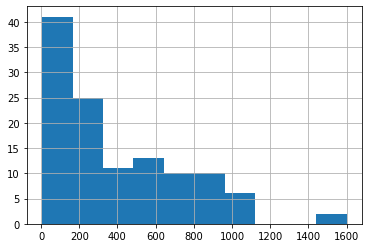

In [46]:
y_train.hist()

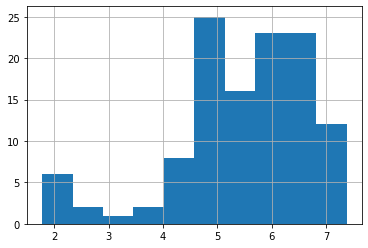

In [47]:
np.log(y_train).hist()

In [48]:
X = pd.get_dummies(data=X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)

reg = linear_model.LinearRegression()

reg.fit(X_train.values, np.log(y_train).values)

sum(np.abs(np.exp(reg.predict(X_train)) - y_train.values)) / len(y_train.values)

46.990766498777504

In [49]:
r2_score(y_train.values, np.exp(reg.predict(X_train)))

0.9293791155180814

**Explain the result above (how?)** Perhaps the lower M.S.E. value and higher R^2 using this method are due to the fact that an error-minimizing O.L.S. model using logged Y values is good to the extent that even exponentiating those values still maintains overall less error.

f.

In [71]:
from sklearn.feature_selection import RFE

selector = RFE(reg, n_features_to_select=None, step=1, verbose=0)
selector = selector.fit(X, y)
selector.ranking_


array([1, 1, 5, 6, 7, 1, 3, 1, 2, 1, 4])

# Question 4 (30 pts)

Using the same data from the previous question, in this question you will explore the application of Lasso and Ridge regression using sklearn package in Python. Use the same train and test data with additional augmented columns from before. Scale the data so that each of the independent variables have zero mean and unit variance. You can use the [sklearn.preprocessing.scale](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html) function for this.

In [51]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV, LassoCV
from sklearn import preprocessing
from sklearn import linear_model, datasets
from sklearn import metrics
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

In [61]:
X_scaled = preprocessing.scale(X)
X_scaled_train = preprocessing.scale(X_train)
X_scaled_test = preprocessing.scale(X_test)

## Answer

1) Use sklearn.linear_model.Lasso and sklearn.linear_model.Ridge classes to do a 5-fold cross validation using sklearn's KFold. For the sweep of the regularization parameter, we will look at a grid of values ranging from  𝜆=1010  to  𝜆=10−2 . In Python, you can consider this range of values as follows:

 Report the best chosen $\lambda$ based on cross validation. The cross validation should happen on your training data using  average MAE as the scoring metric. (8pts)

In [53]:
import numpy as np
import matplotlib.pyplot as plt

lasso = linear_model.Lasso(random_state=0, max_iter=10000)
alphas =  (10**np.linspace(10,-2,100)*0.5)

tuned_parameters = [{'alpha': alphas}]
n_folds = 5

clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, scoring='neg_mean_absolute_error')
clf.fit(X_scaled, y)
print(clf.best_params_)
print(clf.best_score_)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1838.836316273082, tolerance: 1686.9285889285713
  positive)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1986.287859310978, tolerance: 1686.9285889285713
  positive)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2869.1463543056743, tolerance: 1531.3055435118113
  positive)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_

{'alpha': 12.38538177995857}
-100.29672573152834


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5264.115157401655, tolerance: 1686.9285889285713
  positive)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 211042.97731653624, tolerance: 1531.3055435118113
  positive)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2287.964963240316, tolerance: 1757.7161774999995
  positive)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_

In [54]:
ridge = linear_model.Ridge(random_state=0, max_iter=10000)
alphas =  (10**np.linspace(10,-2,100)*0.5)

tuned_parameters = [{'alpha': alphas}]
n_folds = 5

clf = GridSearchCV(ridge, tuned_parameters, cv=n_folds, scoring='neg_mean_absolute_error')
clf.fit(X_scaled, y)
print(clf.best_params_)
print(clf.best_score_)

{'alpha': 28.6118382967511}
-99.02699157968246


2) Run ridge and lasso for all of the alphas specified above (on training data), and plot the coefficients learned for each of them - there should be one plot each for lasso and ridge, so a total of two plots; the plots for different features for a method should be on the same plot. What do you qualitatively observe when value of the regularization parameter is changed? (7pts)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 60964.73802700115, tolerance: 1342.033005398305
  positive)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 157670.3957938414, tolerance: 1342.033005398305
  positive)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 239681.91993824794, tolerance: 1342.033005398305
  positive)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_mod

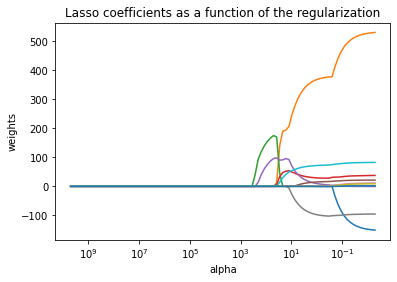

In [59]:
alphas =  (10**np.linspace(10,-2,100)*0.5)
coef_list = []
for i in alphas:
    clf = linear_model.Lasso(alpha=i)
    clf.fit(X_scaled_train, y_train)
    coef_list.append(clf.coef_)
    
ax = plt.gca()

ax.plot(alphas, coef_list)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

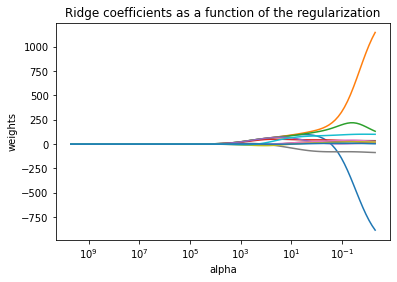

In [60]:
alphas =  (10**np.linspace(10,-2,100)*0.5)
coef_list = []
for i in alphas:
    clf = linear_model.Ridge(alpha=i)
    clf.fit(X_scaled_train, y_train)
    coef_list.append(clf.coef_)
    
ax = plt.gca()

ax.plot(alphas, coef_list)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

3) Run least squares regression, ridge, and lasso on the training data. For ridge and lasso, use only the best regularization parameter. Report the prediction error (MAE) on the test data for each. (5pts)

In [66]:
clf_lasso = linear_model.Lasso(alpha=12.38538177995857)
y_pred_lasso = clf_lasso.fit(X_scaled_train, y_train).predict(X_scaled_test)
MAE_lasso = mean_absolute_error(y_test, y_pred_lasso)
print(MAE_lasso)

clf_ridge = linear_model.Ridge(alpha=28.6118382967511)
y_pred_ridge = clf_ridge.fit(X_scaled_train, y_train).predict(X_scaled_test)
MAE_ridge = mean_absolute_error(y_test, y_pred_ridge)
print(MAE_ridge)

clf_linreg = linear_model.LinearRegression()
y_pred_linreg = clf_linreg.fit(X_scaled_train, y_train).predict(X_scaled_test)
MAE_linreg = mean_absolute_error(y_test, y_pred_linreg)
print(MAE_linreg)

92.97500682245274
94.8523319692987
97.38571988853992


4) Run lasso again with cross validation using [sklearn.linear_model.LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html). Set the cross validation parameters as follows:

Report the best $\lambda$ based on cross validation. Run lasso on the training data using the best $\lambda$ and report the coefficeints for all variables. (5pts)

In [69]:
linear_model.LassoCV(alphas=None, cv=10, max_iter=10000).fit(X_scaled, y).alpha_

9.374048559317556

In [ ]:
clf_lasso = linear_model.Lasso(alpha=9.374048559317556).fit(X_scaled_train, y_train)

5) Why did we have to scale the data before regularization? (5pts)

The variables associated with the individual Beta terms in our regression equation can vary to a great degree.  This is an issue as our tuning parameters will attempt to zero out the lower valued variables (regradless of whether or not they are the more important variables to our model) first while larger valued variables survive longer. For example, if we were building a model that considered an elephant's weight and lifetime, the variable associated with the weight parameter might have a magnitude of 60 while the variable associated with the lifetime parameter might have a magnitude of 10. In this scenario, lets say we know the lifetime parameter is of much more importance to the model than the weight parameter but when we regularize, the lifetime would be zeroed out before the weight parameter. 

# Question 5 (5 pts)
Lasso and ridge regularization techniques are often used to combat overfitting during linear regression. Which of the two yields more sparse models (i.e. fewer number of parameters) when the tuning parameter $\lambda$ is sufficiently large (but not infinite)?

## Answer

When the tuning parameter is sufficiently large, the lasso regularization yields more sparse models. The ridge model will never actually zero out any parameters even with a large tuning parameter, so after regularization you are still left with all the parameters. On the other hand, the sharp corners of the contour of the squared error loss given by the lasso model allows some of the parameters to be zeroed out. Along with more simplicity of interpretation, lasso being more sparse also makes the model more desireable by essentially performing variable selection for us.